<a href="https://colab.research.google.com/github/Manisha80md/Manisha/blob/main/CCEproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes = True)
%matplotlib inline
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score,make_scorer,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [15]:
url = 'https://drive.google.com/file/d/19Y5A1IXoc7sZZrGlIIG8icBVKV-_DUr5/view?usp=share_link'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [16]:
df.head()

CustomerID  Count        Country       State         City  ZipCode  \
0  3668-QPYBK      1  United States  California  Los Angeles    90003   
1  9237-HQITU      1  United States  California  Los Angeles    90005   
2  9305-CDSKC      1  United States  California  Los Angeles    90006   
3  7892-POOKP      1  United States  California  Los Angeles    90010   
4  0280-XJGEX      1  United States  California  Los Angeles    90015   

                  LatLong   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes               Mailed check           53.85       108.15   
1              Yes           Electronic check           70.70       151.65   
2              Yes           Electronic check           99.65        820.5   
3              Yes           Electronic check          104.80      3046.05   
4              Yes  Bank transfer (automatic)          103.70       5036.3   

  ChurnLabel ChurnValue ChurnScore  CLTV                   Churn_Reason  
0        Yes          1         86  3239   Competitor made better offer  
1        Yes          1         67  2701                          Moved  
2        Yes          1         86  5372                          Moved  
3        Yes          1         84  5003                          Moved  
4        Yes          1         89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [17]:
""" Enriching the dataset"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [18]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [19]:
df.loc[(df["TotalCharges"]==" "),"TotalCharges"]=0
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [20]:
df.rename(columns = {'TenureMonths' : 'tenure'}, inplace = True)

In [21]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [22]:
# Check the descriptive statistics of numeric variables
df.describe()

Count       ZipCode     Latitude    Longitude       tenure  \
count  7043.0   7043.000000  7043.000000  7043.000000  7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880    32.371149   
std       0.0   1865.794555     2.455723     2.157889    24.559481   
min       1.0  90001.000000    32.555828  -124.301372     0.000000   
25%       1.0  92102.000000    34.030915  -121.815412     9.000000   
50%       1.0  93552.000000    36.391777  -119.730885    29.000000   
75%       1.0  95351.000000    38.224869  -118.043237    55.000000   
max       1.0  96161.000000    41.962127  -114.192901    72.000000   

       MonthlyCharges  TotalCharges   ChurnValue   ChurnScore         CLTV  
count     7043.000000   7043.000000  7043.000000  7043.000000  7043.000000  
mean        64.761692   2279.734304     0.265370    58.699418  4400.295755  
std         30.090047   2266.794470     0.441561    21.525131  1183.057152  
min         18.250000      0.000000     0.000000     5.000000  2003.000000  
25%         35.500000    398.550000     0.000000    40.000000  3469.000000  
50%         70.350000   1394.550000     0.000000    61.000000  4527.000000  
75%         89.850000   3786.600000     1.000000    75.000000  5380.500000  
max        118.750000   8684.800000     1.000000   100.000000  6500.000000

In [23]:
correlation = df.corr()
correlation

<ipython-input-23-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


Count   ZipCode  Latitude  Longitude    tenure  \
Count             NaN       NaN       NaN        NaN       NaN   
ZipCode           NaN  1.000000  0.895743  -0.784271  0.001041   
Latitude          NaN  0.895743  1.000000  -0.876779 -0.001631   
Longitude         NaN -0.784271 -0.876779   1.000000 -0.001678   
tenure            NaN  0.001041 -0.001631  -0.001678  1.000000   
MonthlyCharges    NaN -0.004596 -0.019899   0.024098  0.247900   
TotalCharges      NaN -0.000884 -0.009944   0.008876  0.826178   
ChurnValue        NaN  0.003346 -0.003384   0.004594 -0.352229   
ChurnScore        NaN -0.002769 -0.007684   0.004260 -0.224987   
CLTV              NaN -0.003562  0.000886   0.000485  0.396406   

                MonthlyCharges  TotalCharges  ChurnValue  ChurnScore      CLTV  
Count                      NaN           NaN         NaN         NaN       NaN  
ZipCode              -0.004596     -0.000884    0.003346   -0.002769 -0.003562  
Latitude             -0.019899     -0.009944   -0.003384   -0.007684  0.000886  
Longitude             0.024098      0.008876    0.004594    0.004260  0.000485  
tenure                0.247900      0.826178   -0.352229   -0.224987  0.396406  
MonthlyCharges        1.000000      0.651174    0.193356    0.133754  0.098693  
TotalCharges          0.651174      1.000000   -0.198324   -0.123410  0.342091  
ChurnValue            0.193356     -0.198324    1.000000    0.664897 -0.127463  
ChurnScore            0.133754     -0.123410    0.664897    1.000000 -0.079782  
CLTV                  0.098693      0.342091   -0.127463   -0.079782  1.000000

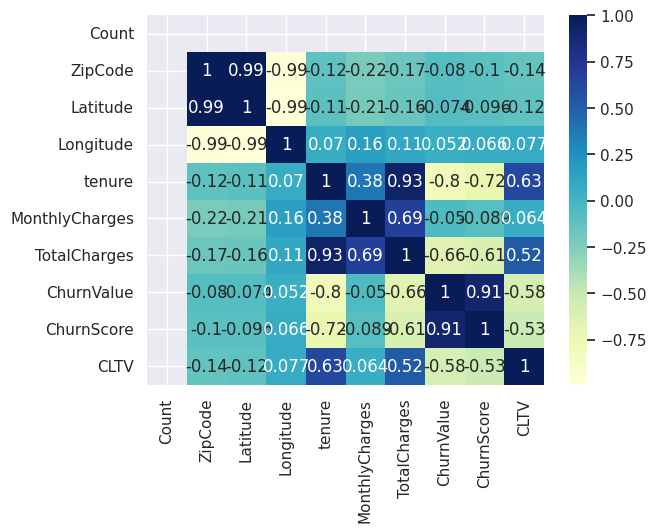

In [24]:
# Displaying Heatmap
dataplot = sns.heatmap(correlation.corr(),cmap="YlGnBu",annot=True)

array([[<Axes: title={'center': 'Count'}>,
        <Axes: title={'center': 'ZipCode'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnValue'}>,
        <Axes: title={'center': 'ChurnScore'}>],
       [<Axes: title={'center': 'CLTV'}>, <Axes: >, <Axes: >]],
      dtype=object)

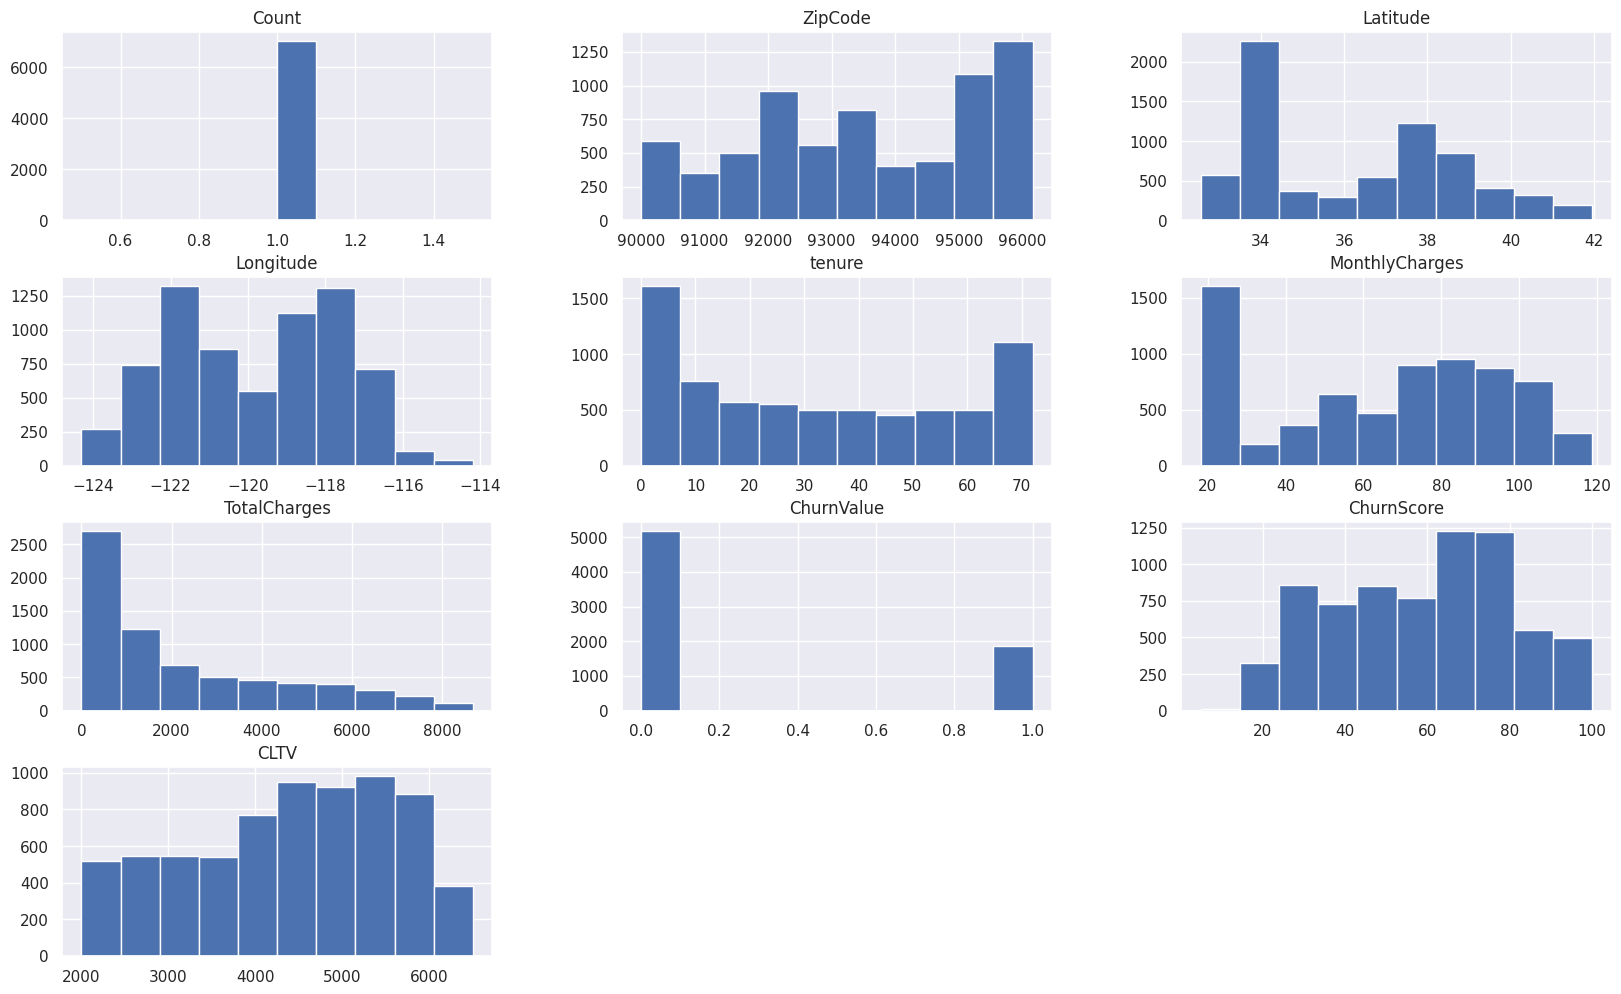

In [25]:
""" To study The Distribution """
# Help in understanding whether to scale it or not
mp.rcParams['figure.figsize']=(20,12)
df.hist()

In [26]:
""" Data Cleaning"""
##1. Create a copy of base data for manupulation & processing

df = df.copy()

In [27]:
df.isnull().sum()

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
Churn_Reason        5174
dtype: int64

In [28]:
# Checking the data types of all the columns
df.dtypes

CustomerID           object
Count                 int64
Country              object
State                object
City                 object
ZipCode               int64
LatLong              object
Latitude            float64
Longitude           float64
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
ChurnLabel           object
ChurnValue            int64
ChurnScore            int64
CLTV                  int64
Churn_Reason         object
dtype: object

In [30]:
categorica_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
categorica_feature

['CustomerID',
 'Country',
 'State',
 'City',
 'LatLong',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'ChurnLabel',
 'Churn_Reason']

In [31]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!='O']
numerical_feature

['Count',
 'ZipCode',
 'Latitude',
 'Longitude',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'ChurnValue',
 'ChurnScore',
 'CLTV']

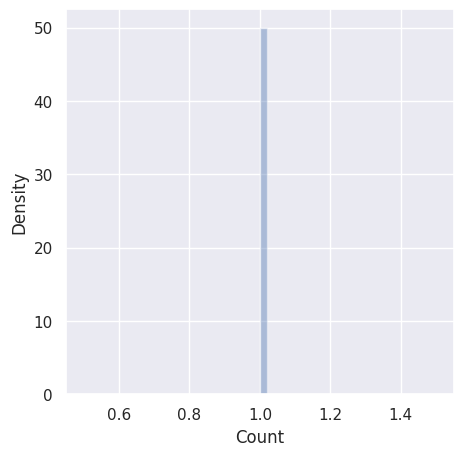

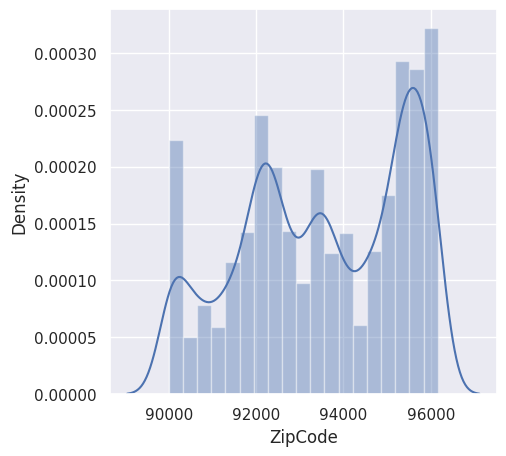

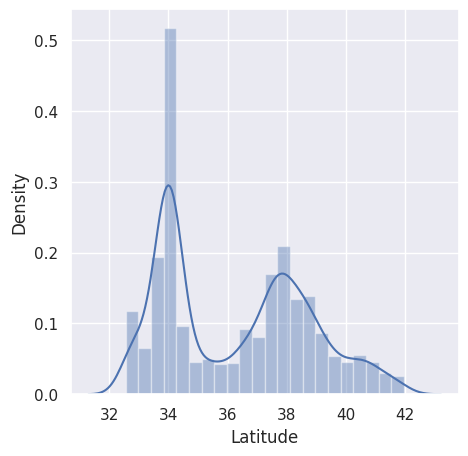

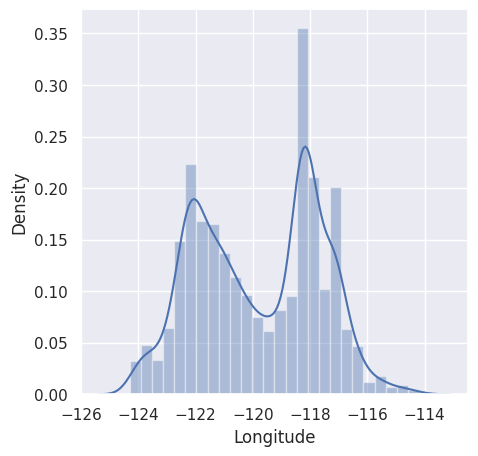

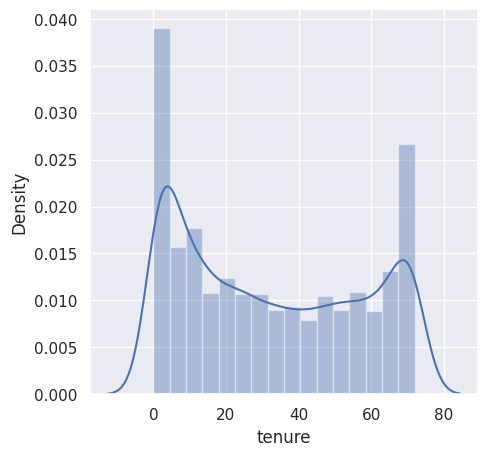

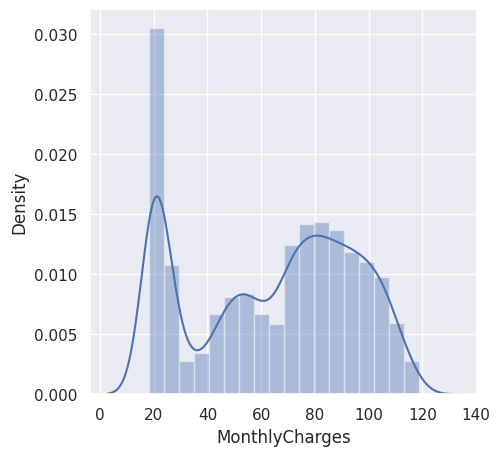

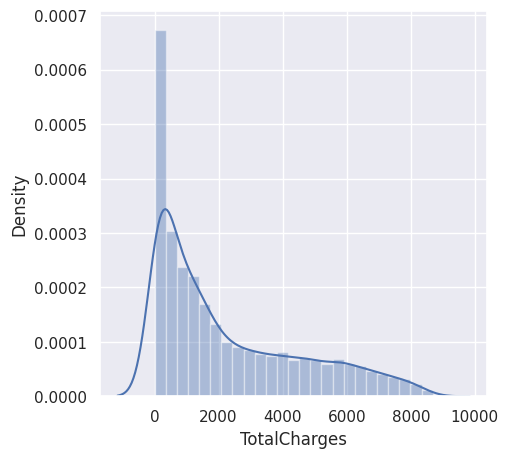

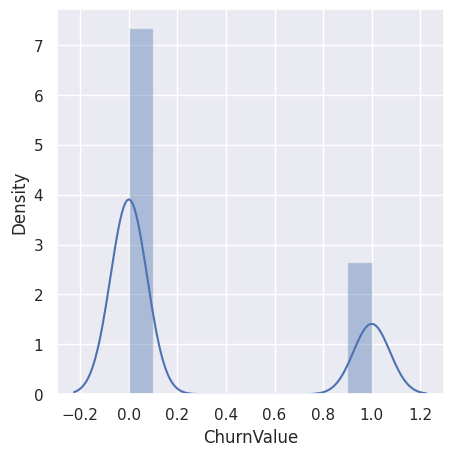

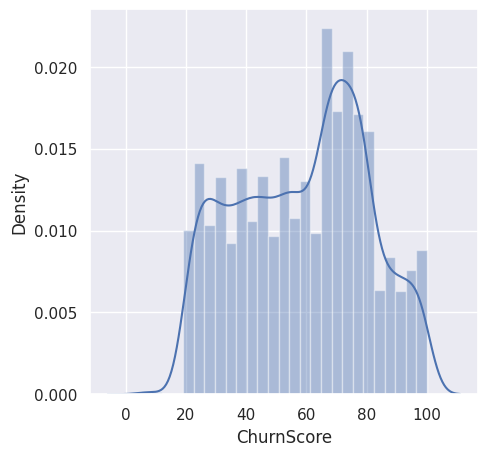

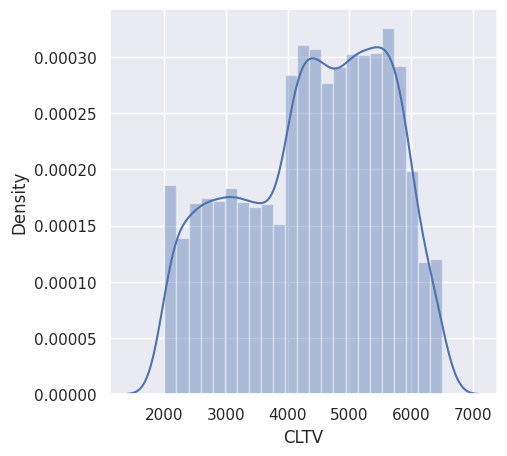

In [35]:
mp.rcParams['figure.figsize']=(5,5)
for i, col in enumerate(numerical_feature):
  mp.figure(i)
  sns.distplot(df[col])

<Axes: xlabel='Gender', ylabel='count'>

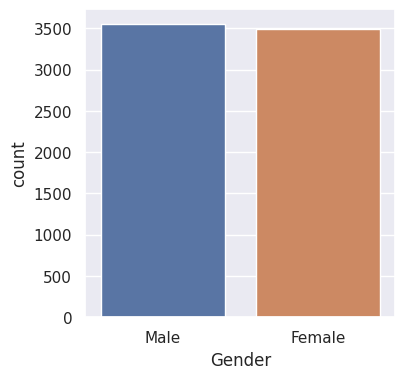

In [38]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x = 'Gender', data=df, ax=ax)

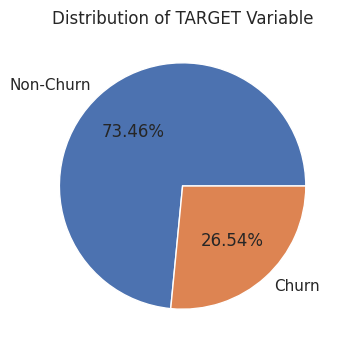

In [39]:
mp.figure(figsize=(8,4))
mylabels = ["Non-Churn", "Churn"]
mp.pie(df['ChurnLabel'].value_counts(), labels=mylabels, autopct='%.2f%%')
mp.title("Distribution of TARGET Variable")
mp.show()

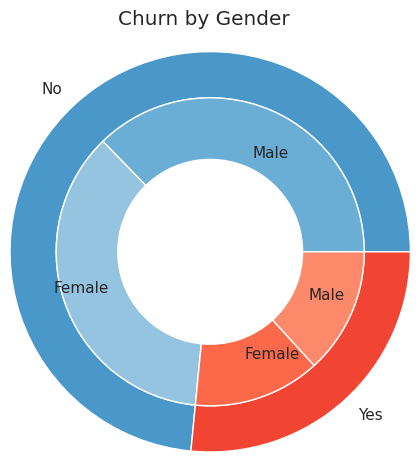

In [41]:
by_gender = df.groupby('ChurnLabel')['Gender'].value_counts().to_frame().rename(columns= {'Gender':'Freq'}).reset_index().sort_values('ChurnLabel')
group_names=df['ChurnLabel'].value_counts().index
group_size=df['ChurnLabel'].value_counts()
subgroup_names=by_gender['Gender']
subgroup_size=by_gender['Freq']



a,b =[mp.cm.Blues, mp.cm.Reds]



fig, ax = mp.subplots()
#mp.figure(figsize=(5,4))
fig.suptitle('Churn by Gender')
ax.axis('equal')

mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
mp.setp( mypie, width=0.3, edgecolor='white')

mypie2, _= ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
mp.setp( mypie2, width=0.4, edgecolor='white')

mp.margins(0,0)

mp.show()

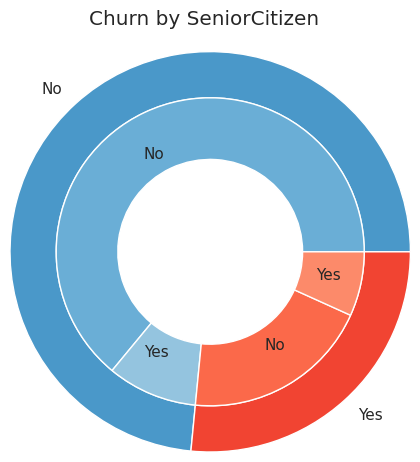

In [42]:
by_senior = df.groupby('ChurnLabel')['SeniorCitizen'].value_counts().to_frame().rename(columns= {'SeniorCitizen':'Freq'}).reset_index().sort_values('ChurnLabel')
group_names=df['ChurnLabel'].value_counts().index
group_size=df['ChurnLabel'].value_counts()
subgroup_names=by_senior['SeniorCitizen']
subgroup_size=by_senior['Freq']

a,b =[mp.cm.Blues, mp.cm.Reds]

fig, ax = mp.subplots()

fig.suptitle('Churn by SeniorCitizen')
ax.axis('equal')

mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
mp.setp( mypie, width=0.3, edgecolor='white')

mypie2, _= ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
mp.setp( mypie2, width=0.4, edgecolor='white')

mp.margins(0,0)

mp.show()

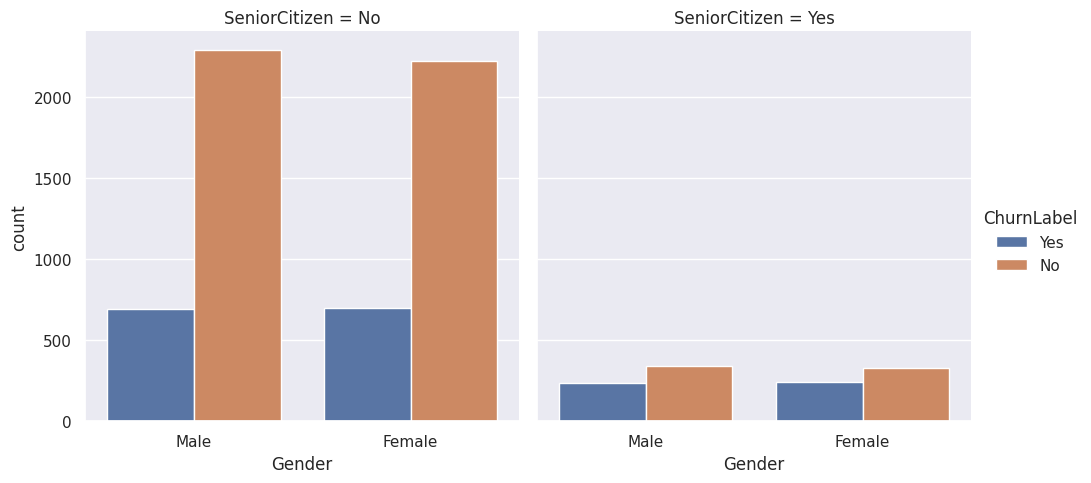

In [48]:
sns.catplot(x='Gender',hue='ChurnLabel',col='SeniorCitizen',kind='count',data=df)

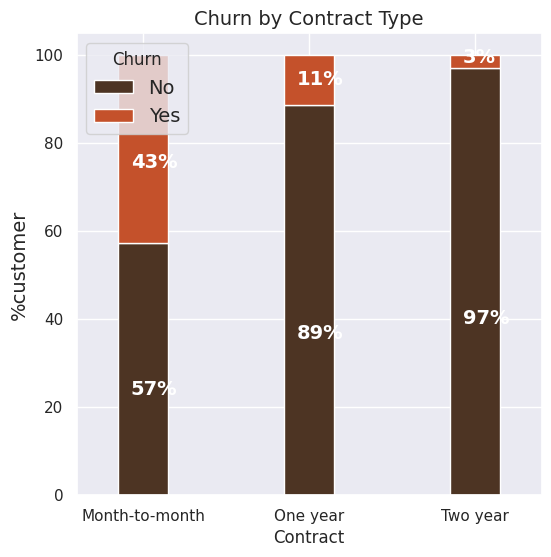

In [53]:
colors= '#4D3423','#C4512B'
contract_churn = df.groupby(['Contract','ChurnLabel']).size().unstack()
ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',width=0.3,stacked=True,rot=0,figsize=(6,6),color=colors)

ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('%customer',size=14)
ax.set_title('Churn by Contract Type', size=14)

for p in ax.patches:
  width, height = p.get_width(),p.get_height()
  x,y = p.get_xy()
  ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),color='white',weight='bold',size=14)

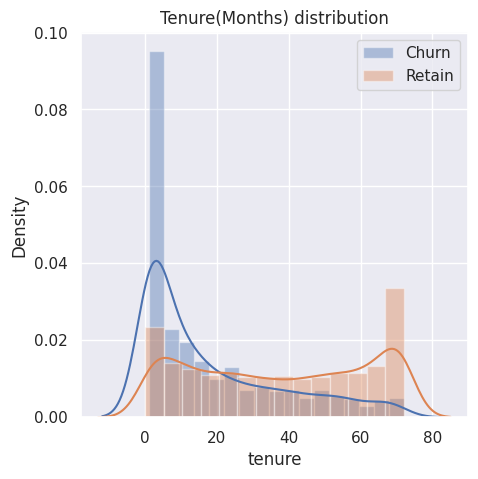

In [54]:
mp.figure(figsize=(5,5))
mp.title('Tenure(Months) distribution')
sns.distplot(df[df['ChurnLabel'] == 'Yes']['tenure'], label='Churn')
sns.distplot(df[df['ChurnLabel'] == 'No']['tenure'], label='Retain')
mp.legend(loc= 'upper right')
mp.show()

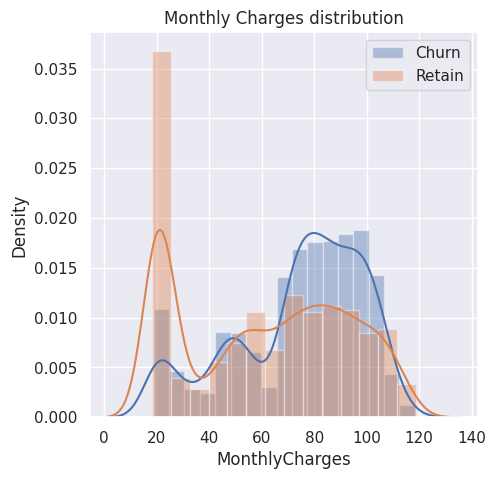

In [56]:
mp.figure(figsize=(5,5))
mp.title('Monthly Charges distribution')
sns.distplot(df[df['ChurnLabel'] == 'Yes']['MonthlyCharges'], label='Churn')
sns.distplot(df[df['ChurnLabel'] == 'No']['MonthlyCharges'], label='Retain')
mp.legend(loc= 'upper right')
mp.show()

In [57]:
import numpy as np
pd.crosstab(df['PaymentMethod'], df['ChurnLabel'], values=df['TotalCharges'], aggfunc=np.mean)

ChurnLabel                 No          Yes
PaymentMethod                             
Bank transfer     3236.911470  2269.812984
Credit card       3198.708178  2350.257759
Electronic check  2609.989838  1463.656769
Mailed check      1170.945744   534.022565

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer'),
  Text(3, 0, 'Credit card')])

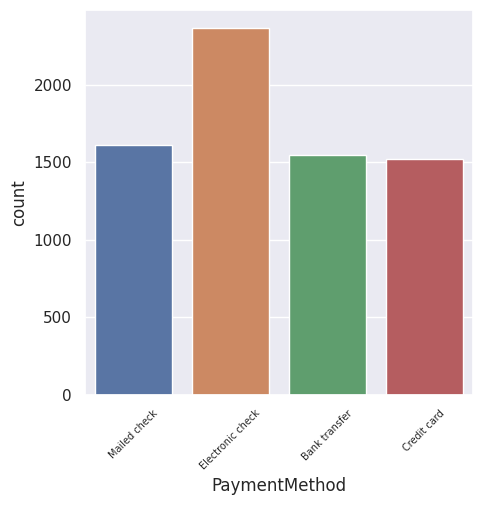

In [58]:
plt.figure(figsize = (5,5))
sns.countplot(x='PaymentMethod',data=df)
plt.xticks(rotation =45,fontsize =7)

In [59]:
import plotly.express as px
Highly_rated = df[df['ChurnScore']>=50]

fig = px.scatter_mapbox(Highly_rated, lat='Latitude', lon='Longitude', hover_name="ZipCode", hover_data =['ChurnScore','City'],color_discrete_sequence=["fuchsia"], zoom=10, height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title="High Churned Score Customer Location", autosize=True, hovermode='closest', showlegend=False)
fig.update_layout(autosize=False, width=800, height=500)

fig.show()

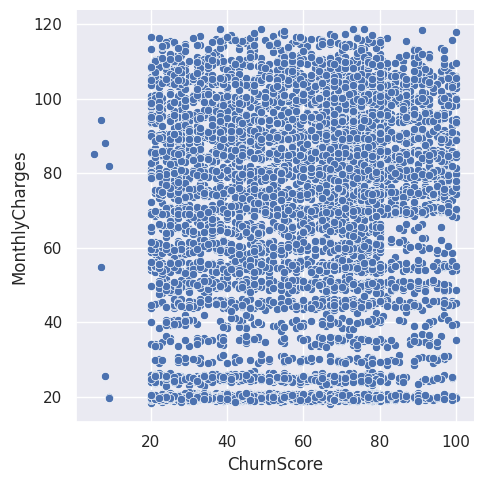

In [65]:
sns.relplot(x="ChurnScore",y="MonthlyCharges",data=df);

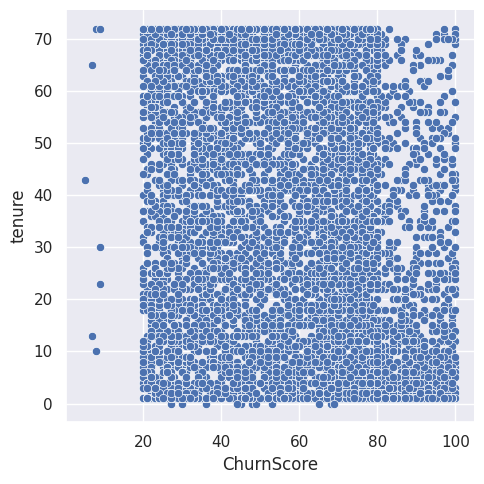

In [66]:
sns.relplot(x="ChurnScore",y="tenure", data=df);

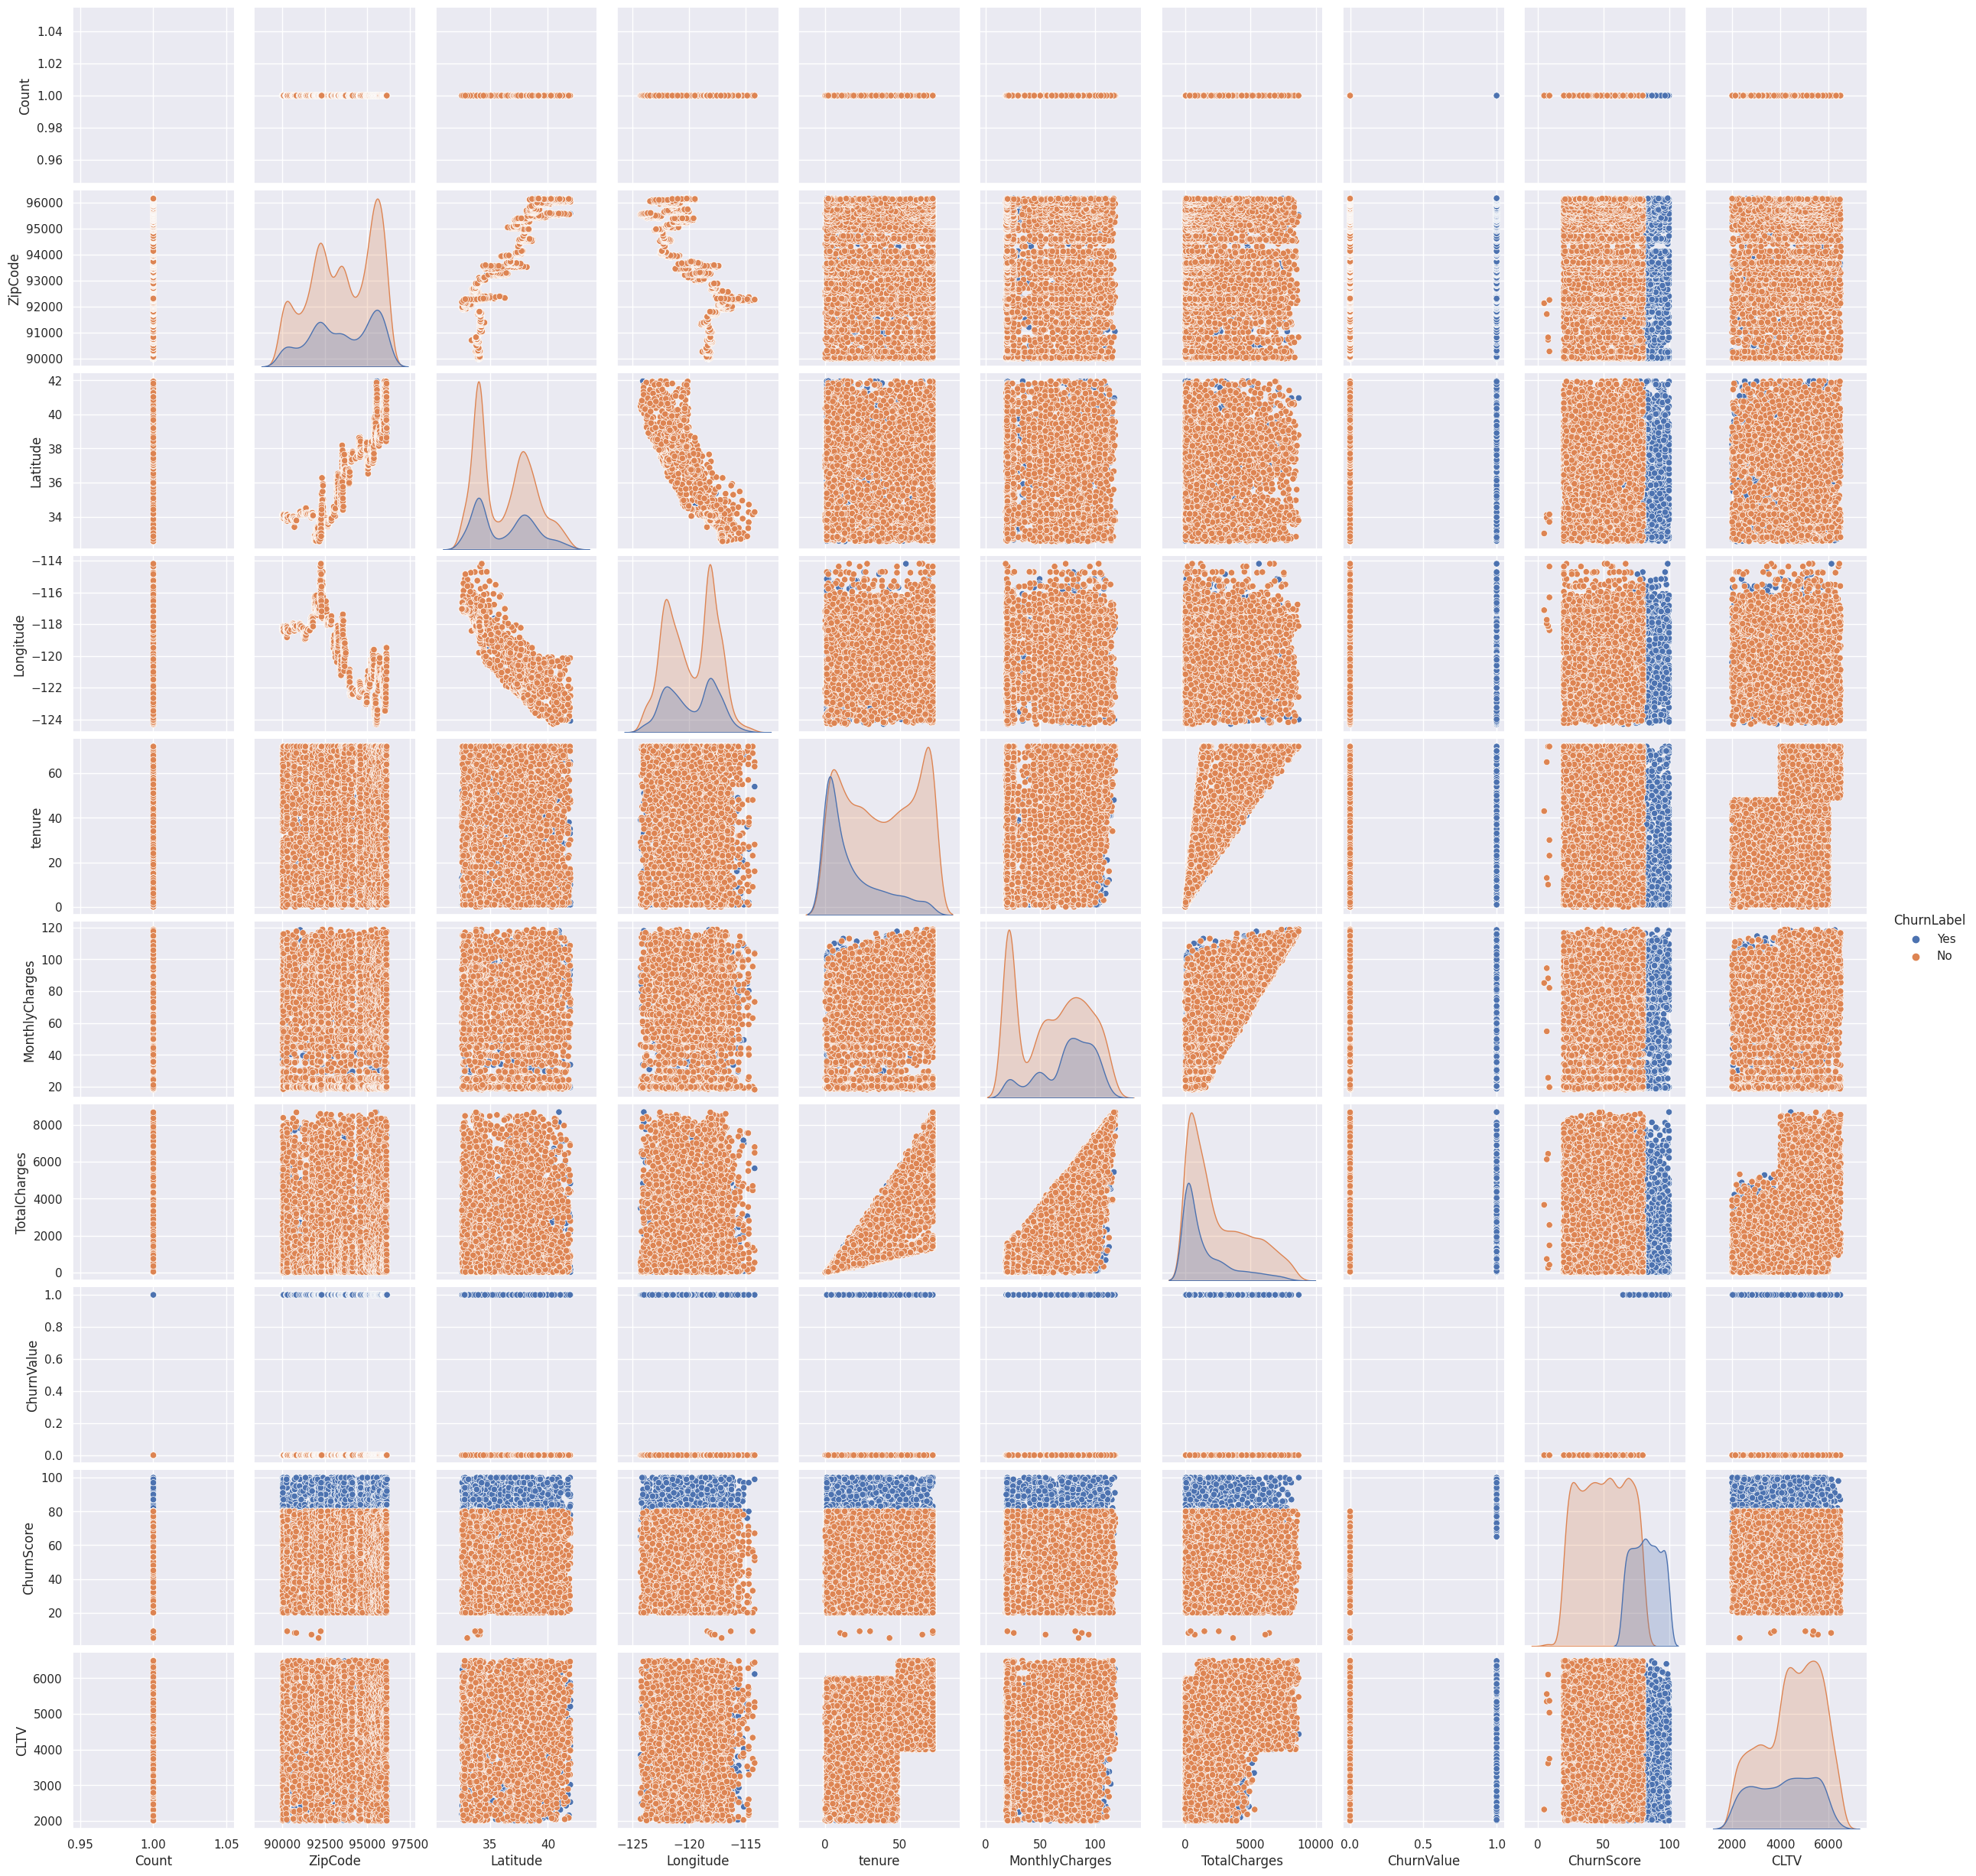

In [67]:
sns.pairplot(df, hue='ChurnLabel')

In [68]:
""" Data Cleaning"""

x_val = df.drop(['ChurnValue','ChurnScore','CLTV','Churn_Reason','Country','ChurnLabel','CustomerID','Count','State','LatLong','Latitude','Longitude'],axis=1)
x_val.head()

City  ZipCode  Gender SeniorCitizen Partner Dependents  tenure  \
0  Los Angeles    90003    Male            No      No         No       2   
1  Los Angeles    90005  Female            No      No        Yes       2   
2  Los Angeles    90006  Female            No      No        Yes       8   
3  Los Angeles    90010  Female            No     Yes        Yes      28   
4  Los Angeles    90015    Male            No      No        Yes      49   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes            No     Fiber optic  ...           No   
2          Yes           Yes     Fiber optic  ...           No   
3          Yes           Yes     Fiber optic  ...           No   
4          Yes           Yes     Fiber optic  ...          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1               No          No          No              No  Month-to-month   
2              Yes          No         Yes             Yes  Month-to-month   
3              Yes         Yes         Yes             Yes  Month-to-month   
4              Yes          No         Yes             Yes  Month-to-month   

  PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges  
0              Yes      Mailed check          53.85        108.15  
1              Yes  Electronic check          70.70        151.65  
2              Yes  Electronic check          99.65        820.50  
3              Yes  Electronic check         104.80       3046.05  
4              Yes     Bank transfer         103.70       5036.30  

[5 rows x 21 columns]

In [69]:
y_val=df['ChurnValue']
y_val.unique()

array([1, 0])

In [70]:
x_val_encoded = pd.get_dummies(x_val,columns = [
 'City',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'])

In [71]:
x_val_encoded.head()

ZipCode  tenure  MonthlyCharges  TotalCharges  City_Acampo  City_Acton  \
0    90003       2           53.85        108.15            0           0   
1    90005       2           70.70        151.65            0           0   
2    90006       8           99.65        820.50            0           0   
3    90010      28          104.80       3046.05            0           0   
4    90015      49          103.70       5036.30            0           0   

   City_Adelanto  City_Adin  City_Agoura Hills  City_Aguanga  ...  \
0              0          0                  0             0  ...   
1              0          0                  0             0  ...   
2              0          0                  0             0  ...   
3              0          0                  0             0  ...   
4              0          0                  0             0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        1                  0   
2                    1                        1                  0   
3                    1                        1                  0   
4                    1                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    0                     1   
2                  0                    0                     1   
3                  0                    0                     1   
4                  0                    0                     1   

   PaymentMethod_Bank transfer  PaymentMethod_Credit card  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            1                          0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               0                           1  
1                               1                           0  
2                               1                           0  
3                               1                           0  
4                               0                           0  

[5 rows x 1176 columns]

In [72]:
""" splitting the X and Y into the Training set and Testing set """
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_val_encoded,y_val,test_size=0.2,random_state=0)

In [73]:
""" Applying standrad performing preprocessing part """
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [104]:
"""Model Building for not handling class imbalance Problem"""
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective = "binary:logistic", missing = None, seed=42)

In [75]:
model_xgb = xgb.XGBClassifier(objective = "binary:logistic")
model_xgb.fit(x_train, y_train, eval_metric='aucpr', early_stopping_rounds=10, eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.65273
[1]	validation_0-aucpr:0.66086
[2]	validation_0-aucpr:0.66867
[3]	validation_0-aucpr:0.66066
[4]	validation_0-aucpr:0.66073
[5]	validation_0-aucpr:0.66542
[6]	validation_0-aucpr:0.66419
[7]	validation_0-aucpr:0.66391
[8]	validation_0-aucpr:0.66405
[9]	validation_0-aucpr:0.66327
[10]	validation_0-aucpr:0.66623
[11]	validation_0-aucpr:0.66685
[12]	validation_0-aucpr:0.66908
[13]	validation_0-aucpr:0.67023
[14]	validation_0-aucpr:0.66270
[15]	validation_0-aucpr:0.66204
[16]	validation_0-aucpr:0.66127
[17]	validation_0-aucpr:0.65940
[18]	validation_0-aucpr:0.65809
[19]	validation_0-aucpr:0.65887
[20]	validation_0-aucpr:0.65879
[21]	validation_0-aucpr:0.65815
[22]	validation_0-aucpr:0.65868
[23]	validation_0-aucpr:0.65338


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
clf_xgb = xgb.XGBClassifier(seed=42,objective = "binary:logistic", gamma = 0.25 ,learn_rate=0.1, max_depth = 4, reg_lamba=10, scale_pos_weight = 3, sub_sample = 0.9,colsample_bytree= 0.5)

In [77]:
m = clf_xgb.fit(x_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(x_test,y_test)])

[01:54:30] WARNING: ../src/learner.cc:767: 
Parameters: { "learn_rate", "reg_lamba", "sub_sample" } are not used.

[0]	validation_0-aucpr:0.54273
[1]	validation_0-aucpr:0.57099
[2]	validation_0-aucpr:0.62206
[3]	validation_0-aucpr:0.62193
[4]	validation_0-aucpr:0.62656
[5]	validation_0-aucpr:0.63549
[6]	validation_0-aucpr:0.64334
[7]	validation_0-aucpr:0.64978
[8]	validation_0-aucpr:0.65210
[9]	validation_0-aucpr:0.65530
[10]	validation_0-aucpr:0.66393
[11]	validation_0-aucpr:0.66089
[12]	validation_0-aucpr:0.65884
[13]	validation_0-aucpr:0.65904
[14]	validation_0-aucpr:0.65764
[15]	validation_0-aucpr:0.66054
[16]	validation_0-aucpr:0.65859
[17]	validation_0-aucpr:0.65850
[18]	validation_0-aucpr:0.66059
[19]	validation_0-aucpr:0.65880
[20]	validation_0-aucpr:0.65851


In [78]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_predicted = model.predict(x_test)
score = model.score(x_test,y_test)

In [80]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1048
           1       0.51      0.49      0.50       361

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



In [105]:
""" test score """
print(score)

0.7501774308019872


In [82]:
# compute confusion matrix
import numpy as np

cnf_matrix = confusion_matrix(y_test,y_predicted)
np.set_printoptions(precision = 2)
cnf_matrix

array([[879, 169],
       [183, 178]])

In [83]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   

    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.(Scikit-learn-confusion matrix)
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.f' if normalize else 'd'

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

   
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[879 169]
 [183 178]]


<Figure size 500x500 with 0 Axes>

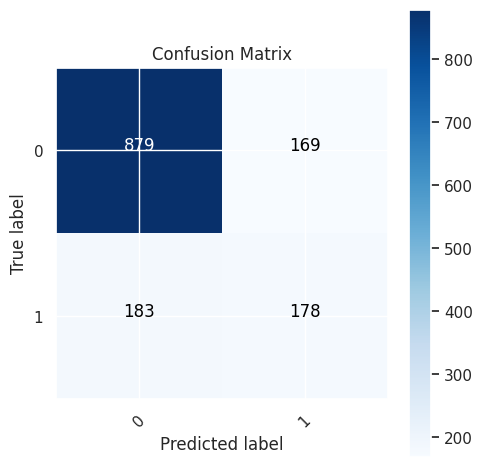

In [85]:
plt.figure()
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=[0,1],title='Confusion Matrix' )  

In [86]:
"""Model Building for class imbalance Problem data by Smote techinque """
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x_val_encoded,y_val,test_size=0.2,random_state=0)

In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res,y_res =sm.fit_resample(x_train,y_train)

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test =pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_

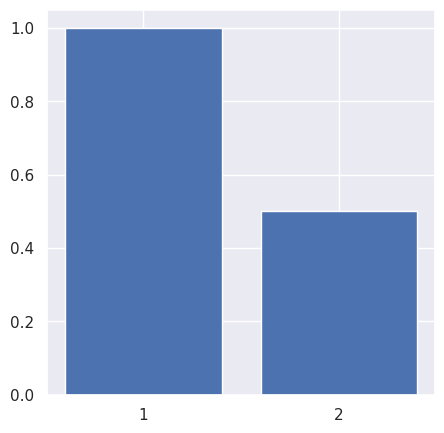

In [90]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls =[str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height = var, tick_label = lbls)
plt.show()

In [91]:
# (As we got better result before) LogisticRegression for train dataset again
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [92]:
# Predicting the test set result using predict function under LogisticRegression
y_pred = classifier.predict(x_test)
y_pred.shape

(1409,)

In [93]:
y_test.shape

(1409,)

In [95]:
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_test, y_pred)
  cm

array([[946, 102],
       [233, 128]])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1048
           1       0.56      0.35      0.43       361

    accuracy                           0.76      1409
   macro avg       0.68      0.63      0.64      1409
weighted avg       0.74      0.76      0.74      1409



In [106]:
print(score)

0.7501774308019872


In [ ]:
""" With PCA, we couldnot see any better result. RESULT ARE SAME. Hence we can finalise Model with LogisticRegression Results """

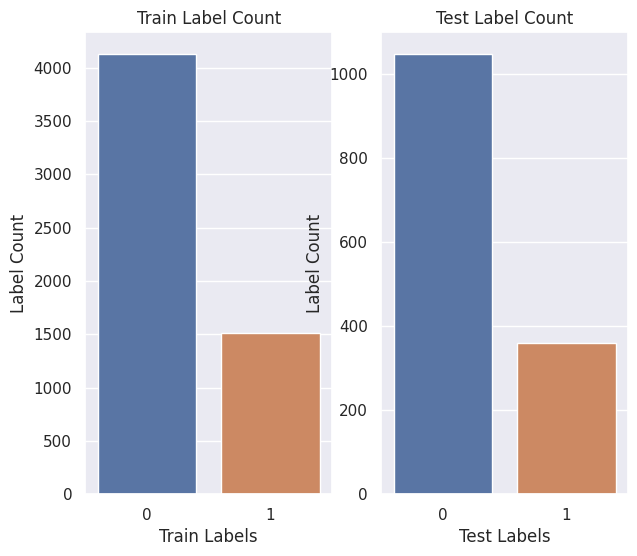

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(7,6))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()